In [1]:
from notebook_helpers import *

In [3]:
from scipy.interpolate import griddata

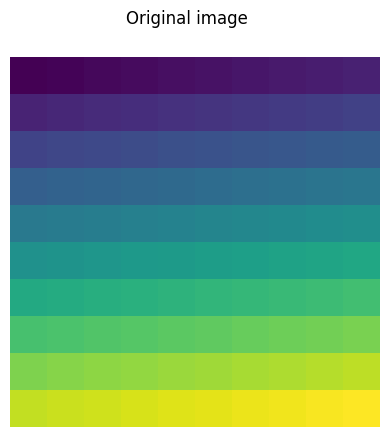

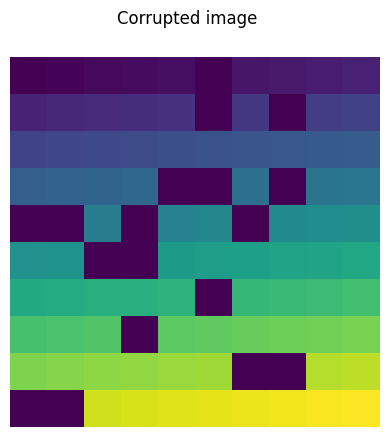

In [51]:
shape = (10,) * 3

original_array = np.arange(np.prod(shape)).reshape(shape)

imshow(original_array[0], title="Original image")

corruption_rate = 0.2
corrupted_array = original_array.copy()
corrupted_array[
    np.where(
        np.random.choice(
            [0, 1], size=np.prod(shape), p=[1 - corruption_rate, corruption_rate]
        ).reshape(original_array.shape)
        > 0
    )
] = 0

imshow(corrupted_array[0], title="Corrupted image")

known_coordinates = np.where(corrupted_array > 0)

x = known_coordinates[0]
y = known_coordinates[1]
d = corrupted_array[known_coordinates]

x_grid_coordinates, y_grid_coordinates, z_grid_coordinates = np.meshgrid(
    range(corrupted_array.shape[0]),
    range(corrupted_array.shape[1]),
    range(corrupted_array.shape[2]),
    indexing="ij",
)

interpolated_values = griddata(
    np.array(known_coordinates).T,
    d,
    (x_grid_coordinates, y_grid_coordinates, z_grid_coordinates),
)

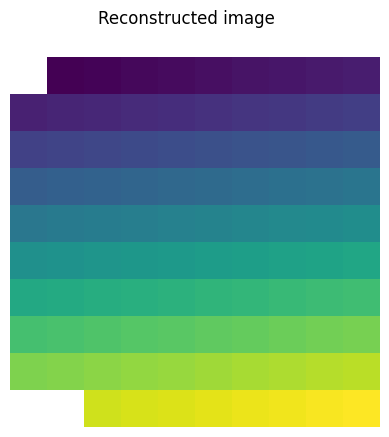

NaN values count: 7


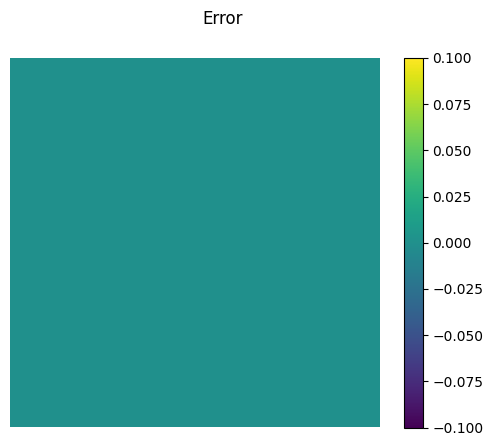

RMSE = 2.6963201038669062e-15


In [52]:
reconstructed_image = interpolated_values.reshape(corrupted_array.shape)
imshow(reconstructed_image[0], title="Reconstructed image")

error_image = original_array - reconstructed_image

print(f"NaN values count: {np.sum(np.isnan(error_image))}")

error_image[np.isnan(error_image)] = 0
imshow(error_image[0], colorbar=True, title="Error")

print(f"RMSE = {np.sqrt(np.mean(error_image ** 2))}")